### EDA Project Plan for BD Road Accident Data:

##### 1.Import packages & Load data
##### 2.Inspect structure
##### 3.Clean data
##### 4.Explore univariate patterns
##### 5.Explore bivariate patterns
##### 6.Correlation and relationships


### 1.Import packages & Load data

In [27]:
# Standard libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


# Set visualization style for better aesthetics
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [28]:
df= pd.read_csv("road_accident_statistics.csv")


### 2.Inspect structure

In [29]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())
print("\nColumn names and data types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

Dataset Shape: (44, 7)

First 5 rows:
   Year  Number of Accidents  Death  Number of Serious Injuries  \
0  1980                 1500   1300                        1200   
1  1981                 1450   1250                        1150   
2  1982                 1400   1200                        1100   
3  1983                 1350   1150                        1050   
4  1984                 1300   1100                        1000   

   Number of Minor Injuries  Number of Moderate Injuries  \
0                       400                          200   
1                       380                          190   
2                       360                          180   
3                       340                          170   
4                       320                          160   

   Number of Severe Injuries  
0                        100  
1                         95  
2                         90  
3                         85  
4                         80  

Last 5 rows

In [30]:
df.head(3)

,Year,Number of Accidents,Death,Number of Serious Injuries,Number of Minor Injuries,Number of Moderate Injuries,Number of Severe Injuries
0,1980,1500,1300,1200,400,200,100
1,1981,1450,1250,1150,380,190,95
2,1982,1400,1200,1100,360,180,90


In [31]:
print(f"\nYear range: {df['Year'].min()} to {df['Year'].max()}")


Year range: 1980 to 2023


### 3. Clean Data

In [32]:
# Create a copy for cleaning
df_cleaned = df.copy()

In [33]:
# Check for missing values or null values

print("\nMissing values in each column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# There are no missing values, so we can proceed with the analysis


Missing values in each column:
Year                           0
Number of Accidents            0
Death                          0
Number of Serious Injuries     0
Number of Minor Injuries       0
Number of Moderate Injuries    0
Number of Severe Injuries      0
dtype: int64

Total missing values: 0


In [34]:
# Check for duplicates
print("\nDuplicate rows:")
print(df_cleaned.duplicated())
print(f"\nTotal duplicate rows: {df_cleaned.duplicated().sum()}")
# There are no duplicate rows, so we can proceed with the analysis


Duplicate rows:
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
dtype: bool

Total duplicate rows: 0


In [35]:
# Checking for impossible values
df_cleaned.loc[(df_cleaned['Year']==0) | (df_cleaned['Number of Accidents']==0) | (df_cleaned['Death']==0) | (df_cleaned['Number of Serious Injuries']==0)]

# There is no impossible values, so we can proceed with the analysis

,Year,Number of Accidents,Death,Number of Serious Injuries,Number of Minor Injuries,Number of Moderate Injuries,Number of Severe Injuries


### 4. Explore univariate patterns

UNIVARIATE ANALYSIS


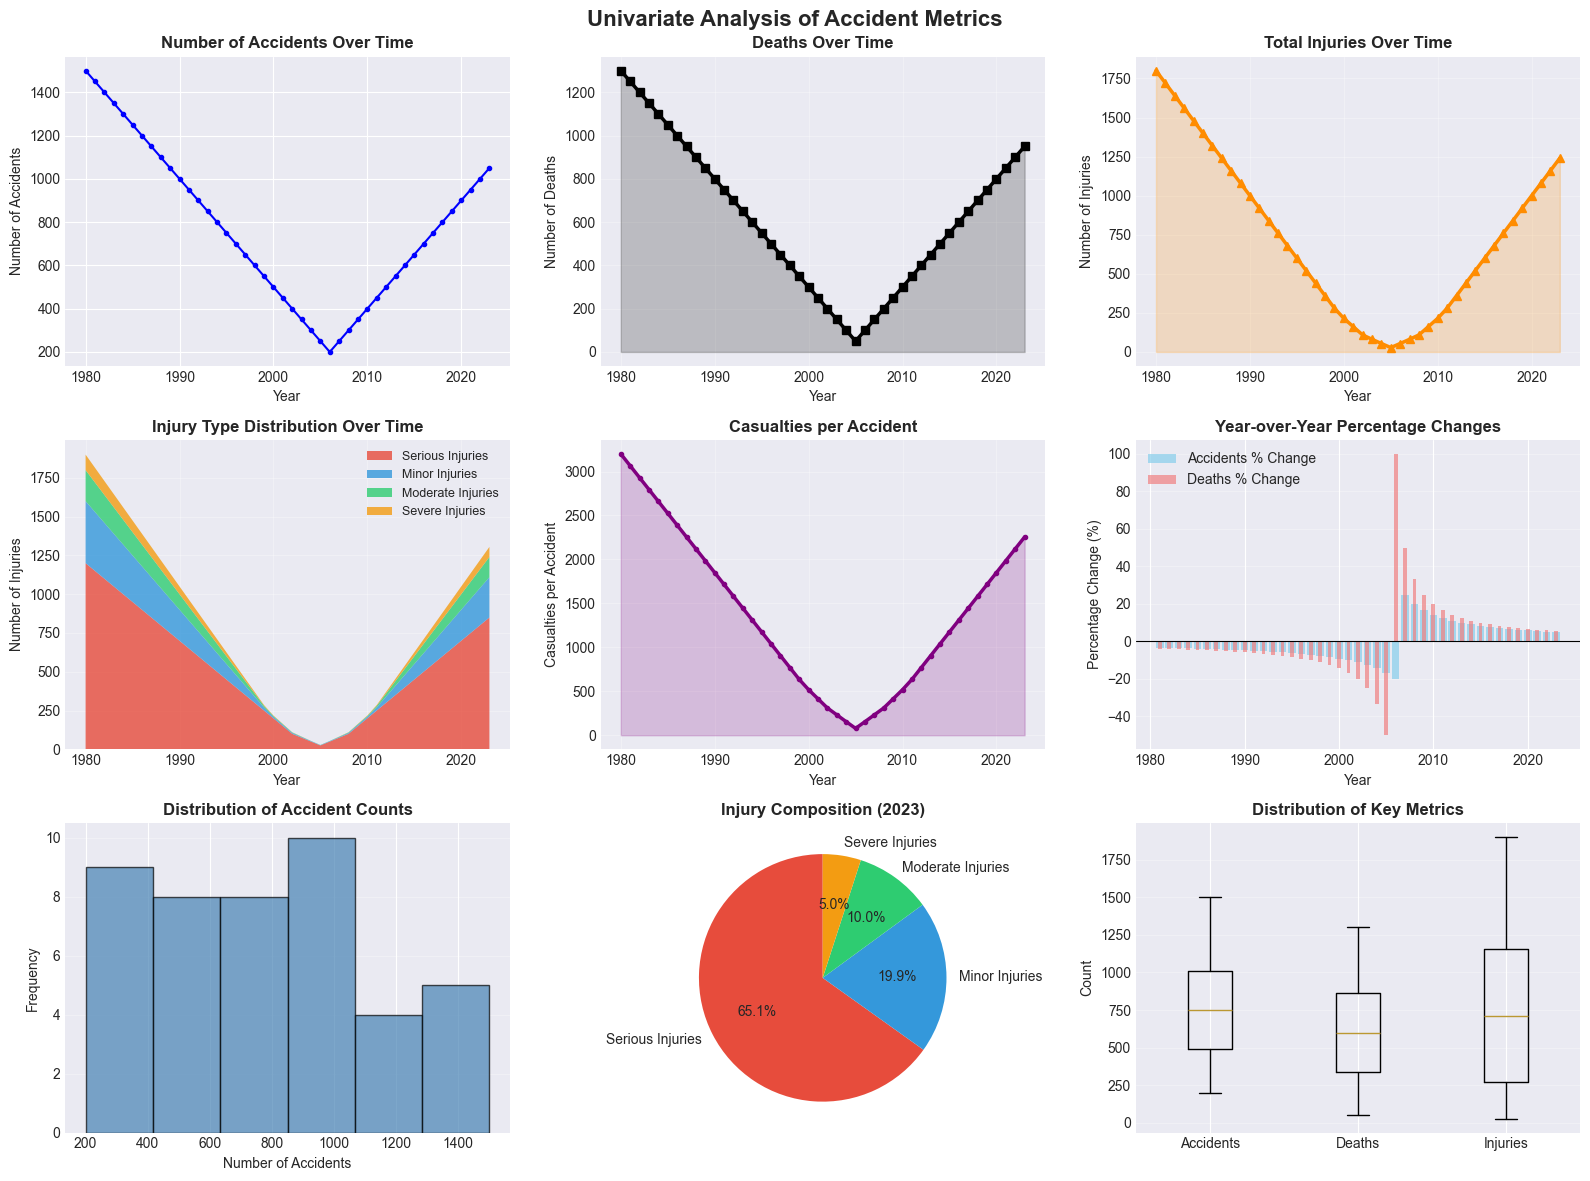


KEY STATISTICS:
----------------------------------------
Total Accidents (1980-1986): 34,000
Total Deaths (1980-1986): 27,000
Total Injuries (1980-1986): 33,469
Average Accidents per Year: 773
Average Deaths per Year: 614
Average Casualties per Accident: 1374.30


In [36]:
print("="*60)
print("UNIVARIATE ANALYSIS")
print("="*60)

# Set up visualization layout
plt.figure(figsize=(16, 12))
plt.suptitle('Univariate Analysis of Accident Metrics', fontsize=16, fontweight='bold')

# Plot 1: Number of Accidents over time
plt.subplot(3,3,1)
plt.plot(df_cleaned['Year'], df_cleaned['Number of Accidents'], marker='.', linestyle='-', color='blue')
plt.title('Number of Accidents Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

# Plot 2: Deaths over time
plt.subplot(3,3,2)
plt.plot(df_cleaned['Year'], df_cleaned['Death'], marker='s', linewidth=2.5, color='black')
plt.title('Deaths Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True, alpha=0.3)
plt.fill_between(df_cleaned['Year'], df_cleaned['Death'], alpha=0.2, color='black')

# Plot 3: Total Injuries over time
Total_Injuries = df_cleaned['Number of Serious Injuries'] + df_cleaned['Number of Minor Injuries'] + df_cleaned['Number of Moderate Injuries']
plt.subplot(3,3,3)
plt.plot(df_cleaned['Year'], Total_Injuries,marker='^', linewidth=2.5, color='darkorange')
plt.title('Total Injuries Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.grid(True, alpha=0.3)
plt.fill_between(df_cleaned['Year'],Total_Injuries, alpha=0.2, color='darkorange')

# Plot 4: Injury type distribution (stacked area)
plt.subplot(3,3,4)
injury_cols = ['Number of Serious Injuries', 'Number of Minor Injuries', 
               'Number of Moderate Injuries', 'Number of Severe Injuries']
colors_injuries = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']

plt.stackplot(df_cleaned['Year'],df_cleaned[injury_cols].T.values,labels=[col.replace('Number of ', '') for col in injury_cols],colors=colors_injuries, alpha=0.8)
plt.title('Injury Type Distribution Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.legend(loc='upper right', fontsize=9)
plt.grid(True, alpha=0.3)

# Plot 5: Casualties per Accident
plt.subplot(3,3,5)
Casualties_per_Accident = df_cleaned['Death'] + df_cleaned['Number of Serious Injuries'] + df_cleaned['Number of Minor Injuries'] + df_cleaned['Number of Moderate Injuries'] + df_cleaned['Number of Severe Injuries']
plt.plot(df_cleaned['Year'], Casualties_per_Accident, marker='.', linewidth=2.5, color='purple')
plt.title('Casualties per Accident', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Casualties per Accident')
plt.grid(True, alpha=0.3)
plt.fill_between(df_cleaned['Year'],Casualties_per_Accident, alpha=0.2, color='purple')

# Plot 6: Year-over-year changes
plt.subplot(3,3,6)
Accidents_YoY_Change = df_cleaned['Number of Accidents'].pct_change()*100
Deaths_YoY_Change = df_cleaned['Death'].pct_change()*100
plt.bar(df_cleaned['Year'].iloc[1:],Accidents_YoY_Change.iloc[1:],color='skyblue', alpha=0.7, label='Accidents % Change')
plt.bar(df_cleaned['Year'].iloc[1:],Deaths_YoY_Change.iloc[1:], color='lightcoral', alpha=0.7, label='Deaths % Change', width=0.4)
plt.title('Year-over-Year Percentage Changes', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Plot 7: Histogram of accident counts
plt.subplot(3,3,7)
plt.hist(df_cleaned['Number of Accidents'], bins=6,edgecolor='black', alpha=0.7, color='steelblue')
plt.title('Distribution of Accident Counts', fontsize=12, fontweight='bold')
plt.xlabel('Number of Accidents')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3, axis='y')

# Plot 8: Pie chart for injury composition (latest year)
plt.subplot(3,3,8)
latest_year = df_cleaned['Year'].max()
latest_data = df_cleaned[df_cleaned['Year'] == latest_year]
injury_values = [latest_data[col].values[0] for col in injury_cols]
plt.pie(injury_values, labels=[col.replace('Number of ', '') for col in injury_cols],colors=colors_injuries, autopct='%1.1f%%', startangle=90)
plt.title(f'Injury Composition ({latest_year})', fontsize=12, fontweight='bold')

# Plot 9: Boxplot of key metrics
plt.subplot(3,3,9)
Total_Injuries = df_cleaned['Number of Serious Injuries'] + df_cleaned['Number of Minor Injuries'] + df_cleaned['Number of Moderate Injuries'] + df_cleaned['Number of Severe Injuries']
df_cleaned['Total Injuries'] = Total_Injuries
boxplot_data = df_cleaned[['Number of Accidents', 'Death', "Total Injuries"]]
plt.boxplot([boxplot_data[col] for col in boxplot_data.columns],labels=['Accidents', 'Deaths', 'Injuries'])
plt.title('Distribution of Key Metrics', fontsize=12, fontweight='bold')
plt.ylabel('Count')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


# Print key statistics
print("\nKEY STATISTICS:")
print("-" * 40)
print(f"Total Accidents (1980-1986): {df_cleaned['Number of Accidents'].sum():,}")
print(f"Total Deaths (1980-1986): {df_cleaned['Death'].sum():,}")
print(f"Total Injuries (1980-1986): {df_cleaned['Total Injuries'].sum():,}")
print(f"Average Accidents per Year: {df_cleaned['Number of Accidents'].mean():.0f}")
print(f"Average Deaths per Year: {df_cleaned['Death'].mean():.0f}")
print(f"Average Casualties per Accident: {Casualties_per_Accident.mean():.2f}")


### 6. Explore bivariate patterns

BIVARIATE ANALYSIS - ROAD ACCIDENT METRICS RELATIONSHIPS


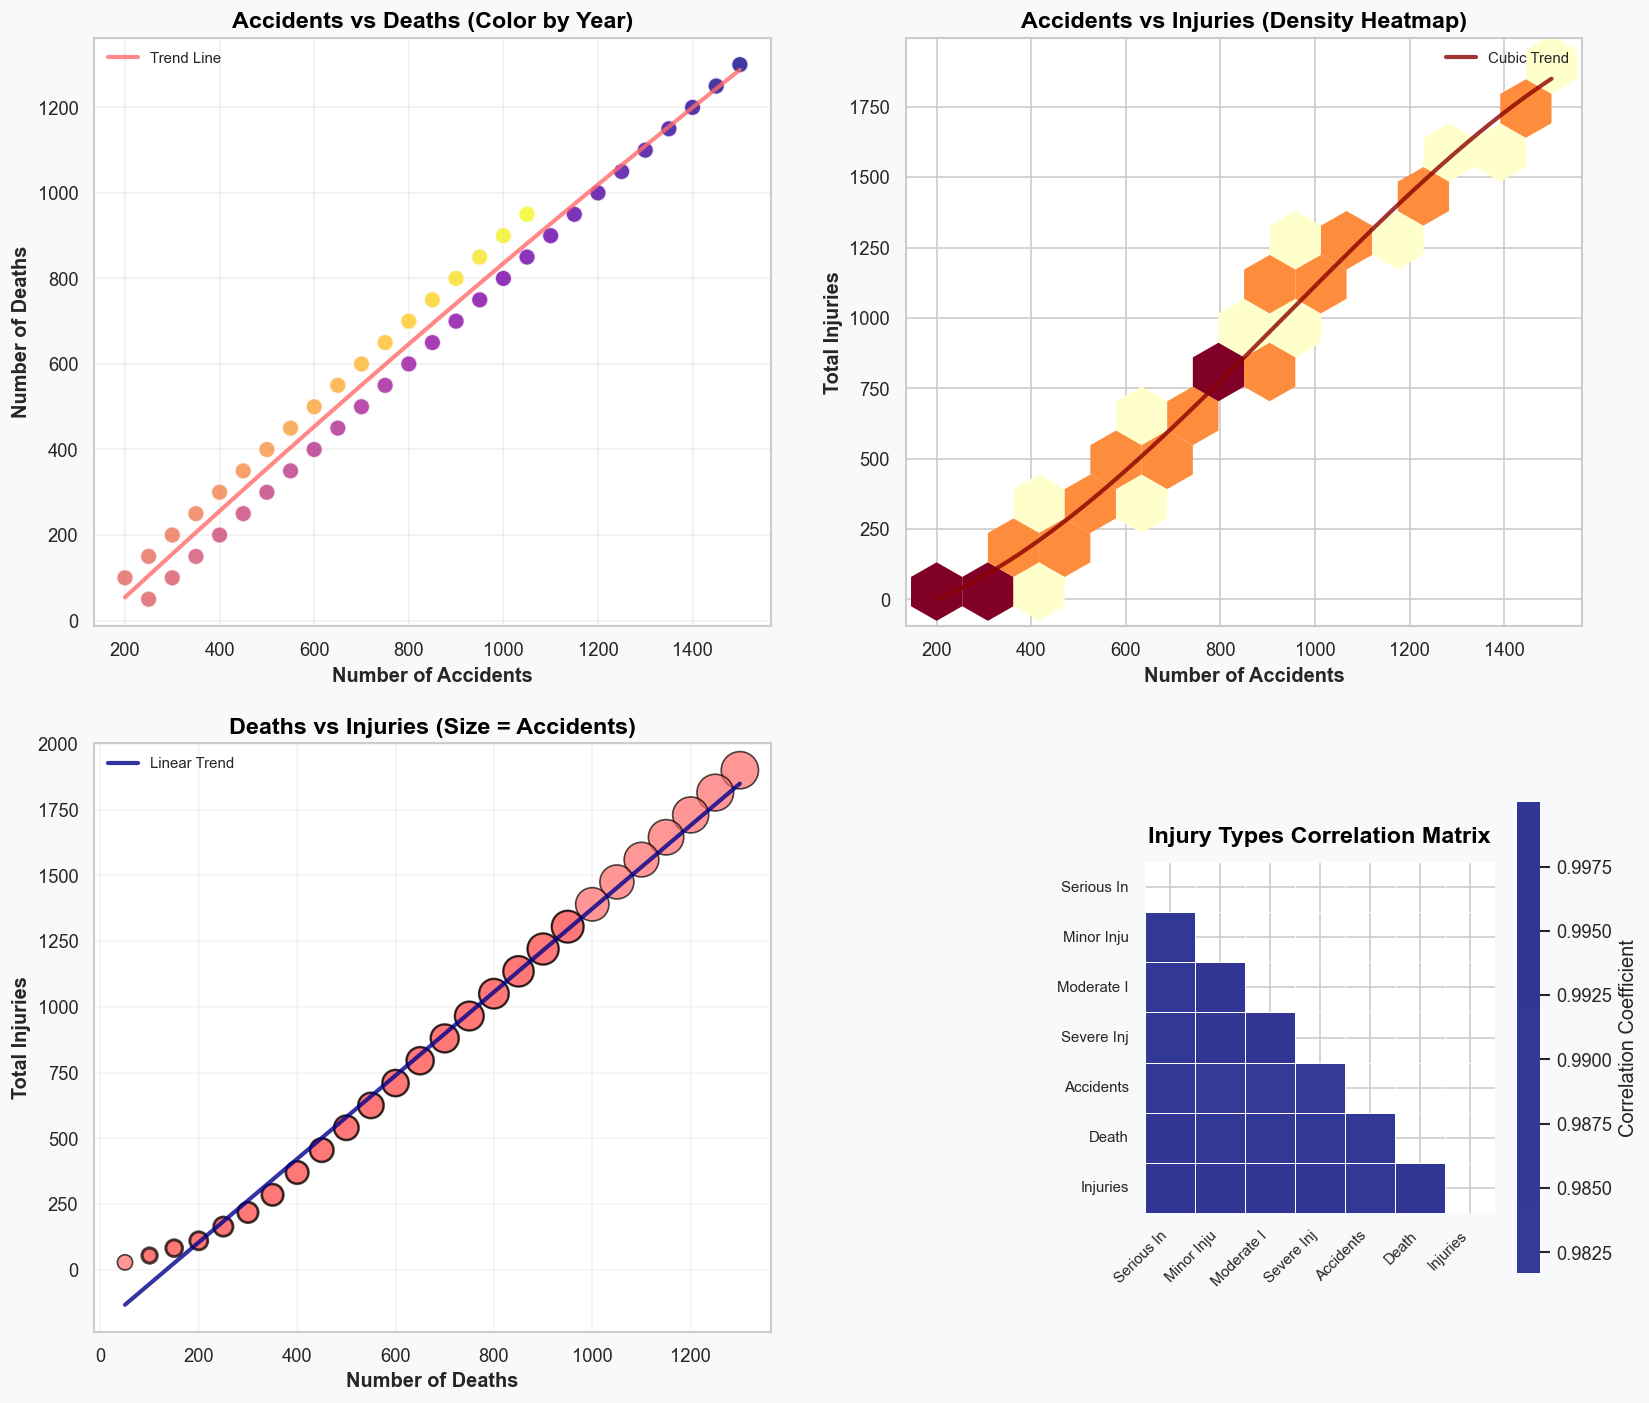


▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰
CORRELATION ANALYSIS RESULTS
▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰▰

📊 Key Correlation Coefficients:
--------------------------------------------------
• Accidents vs Deaths:      0.991 (Very Strong)
• Accidents vs Injuries:    0.989 (Very Strong)
• Deaths vs Injuries:       0.996 (Very Strong)

🔍 Key Insights:
------------------------------
✓ High correlation suggests that as accidents increase, deaths increase proportionally
✓ Very strong correlation between deaths and injuries suggests similar underlying factors


In [47]:
print("="*80)
print("BIVARIATE ANALYSIS - ROAD ACCIDENT METRICS RELATIONSHIPS")
print("="*80)

# Set the visual style
plt.figure(figsize=(16, 14), dpi=120, facecolor="#f8f9fa", edgecolor="k")
sns.set_theme(style="whitegrid")

# Create color palettes
palettes = {
    'primary': ['#FF6B6B', '#4ECDC4', '#FFD166', '#06D6A0', '#118AB2', '#EF476F'],
    'gradient': ['#FF9A8B', '#FF6B6B', '#FF8E53', '#FFCA3A', '#8AC926', '#1982C4'],
    'cool': ['#0096C7', '#00B4D8', '#48CAE4', '#90E0EF', '#ADE8F4', '#CAF0F8'],
    'warm': ['#FF4800', '#FF5400', '#FF6000', '#FF6D00', '#FF8500', '#FF9100']
}

# Plot 1: Accidents vs Deaths scatter
plt.subplot(2, 2, 1)
scatter1 = plt.scatter(df_cleaned['Number of Accidents'], df_cleaned['Death'], 
                       s=100, alpha=0.8, c=df_cleaned['Year'], 
                       cmap='plasma', edgecolors='white', linewidth=1)
plt.xlabel('Number of Accidents', fontsize=12, fontweight='bold')
plt.ylabel('Number of Deaths', fontsize=12, fontweight='bold')
plt.title("Accidents vs Deaths (Color by Year)", fontsize=14, fontweight='bold', color='black')
plt.grid(True, alpha=0.3)

# Add regression line
z1 = np.polyfit(df_cleaned['Number of Accidents'], df_cleaned['Death'], 2)
p1 = np.poly1d(z1)
x_sorted = np.sort(df_cleaned['Number of Accidents'])
plt.plot(x_sorted, p1(x_sorted), color=palettes['primary'][0], 
         linewidth=2.5, linestyle='-', alpha=0.8, label='Trend Line')
plt.legend(fontsize=9)

# Plot 2: Accidents vs Total Injuries with hexbin
plt.subplot(2, 2, 2)
hb = plt.hexbin(df_cleaned['Number of Accidents'], df_cleaned['Total Injuries'], 
                gridsize=12, cmap='YlOrRd', mincnt=1, edgecolors='none')
plt.xlabel('Number of Accidents', fontsize=12, fontweight='bold')
plt.ylabel('Total Injuries', fontsize=12, fontweight='bold')
plt.title("Accidents vs Injuries (Density Heatmap)", fontsize=14, fontweight='bold', color='black')

# Add smoothed trend line (polynomial fit to avoid duplicate issues)
x_data = df_cleaned['Number of Accidents'].values
y_data = df_cleaned['Total Injuries'].values
coeffs = np.polyfit(x_data, y_data, 3)
p = np.poly1d(coeffs)
x_smooth = np.linspace(x_data.min(), x_data.max(), 300)
y_smooth = p(x_smooth)
plt.plot(x_smooth, y_smooth, color='darkred', linewidth=2.5, alpha=0.8, 
         label='Cubic Trend')

plt.legend(fontsize=9)

# Plot 3: Deaths vs Injuries 3D scatter effect
plt.subplot(2, 2, 3)
sizes = df_cleaned['Number of Accidents'] / df_cleaned['Number of Accidents'].max() * 500
scatter3 = plt.scatter(df_cleaned['Death'], df_cleaned['Total Injuries'], 
                       s=sizes, alpha=0.7, c=palettes['gradient'][1], 
                       edgecolors='black', linewidth=1, 
                       marker='o', zorder=2)
plt.xlabel('Number of Deaths', fontsize=12, fontweight='bold')
plt.ylabel('Total Injuries', fontsize=12, fontweight='bold')
plt.title("Deaths vs Injuries (Size = Accidents)", fontsize=14, fontweight='bold', color='black')
plt.grid(True, alpha=0.2, zorder=1)

# Add linear trend line
z3 = np.polyfit(df_cleaned['Death'], df_cleaned['Total Injuries'], 1)
p3 = np.poly1d(z3)
death_sorted = np.sort(df_cleaned['Death'])
plt.plot(death_sorted, p3(death_sorted), color='darkblue', linewidth=2.5, alpha=0.8, 
         label='Linear Trend')
plt.legend(fontsize=9)

# Plot 4: Normalized Trends Comparison
plt.subplot(2, 3, 6)
# Calculate correlations
injury_cols_extended = injury_cols + ['Number of Accidents', 'Death', 'Total Injuries']
corr_matrix = df_cleaned[injury_cols_extended].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create heatmap with diverging colormap
sns.heatmap(corr_matrix, mask=mask, cmap='RdYlBu', center=0,
            square=True, linewidths=0.5, linecolor='white',
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

# Customize ticks
plt.xticks(ticks=np.arange(len(injury_cols_extended)) + 0.5, 
           labels=[col.replace('Number of ', '').replace('Total ', '')[:10] 
                   for col in injury_cols_extended], 
           rotation=45, ha='right', fontsize=9)
plt.yticks(ticks=np.arange(len(injury_cols_extended)) + 0.5, 
           labels=[col.replace('Number of ', '').replace('Total ', '')[:10] 
                   for col in injury_cols_extended], 
           rotation=0, fontsize=9)

plt.title("Injury Types Correlation Matrix", fontsize=14, fontweight='bold', color='black', pad=12)


plt.tight_layout()
plt.show()

# Enhanced correlation display
print("\n" + "▰"*70)
print("CORRELATION ANALYSIS RESULTS")
print("▰"*70)

# Calculate correlations
corr_acc_death = df_cleaned['Number of Accidents'].corr(df_cleaned['Death'])
corr_acc_inj = df_cleaned['Number of Accidents'].corr(df_cleaned['Total Injuries'])
corr_death_inj = df_cleaned['Death'].corr(df_cleaned['Total Injuries'])

# Display correlations with color coding
def color_corr(value):
    if abs(value) >= 0.8:
        return f"\033[92m{value:.3f} (Very Strong)\033[0m"
    elif abs(value) >= 0.6:
        return f"\033[93m{value:.3f} (Strong)\033[0m"
    elif abs(value) >= 0.4:
        return f"\033[94m{value:.3f} (Moderate)\033[0m"
    elif abs(value) >= 0.2:
        return f"\033[95m{value:.3f} (Weak)\033[0m"
    else:
        return f"{value:.3f} (Very Weak)"

print("\n📊 Key Correlation Coefficients:")
print("-" * 50)
print(f"• Accidents vs Deaths:      {color_corr(corr_acc_death)}")
print(f"• Accidents vs Injuries:    {color_corr(corr_acc_inj)}")
print(f"• Deaths vs Injuries:       {color_corr(corr_death_inj)}")

# Additional insights
print("\n🔍 Key Insights:")
print("-" * 30)
if corr_acc_death > 0.7:
    print("✓ High correlation suggests that as accidents increase, deaths increase proportionally")
elif corr_acc_death < 0.3:
    print("✓ Low correlation may indicate improvements in safety measures despite accident frequency")

if corr_acc_inj > corr_acc_death:
    print("✓ Injuries correlate more strongly with accidents than deaths do")
    
if corr_death_inj > 0.8:
    print("✓ Very strong correlation between deaths and injuries suggests similar underlying factors")